**Лабораторная работа №1**

In [53]:
import math
import os
import array as arr
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

Чтение изображения из файла:

In [54]:
image = plt.imread(r"C:\Users\ewgen\Desktop\Хаткевич\бобёр3.jpg").copy()


Вывод изображения

In [55]:
def show_image(ax, image, title=None, cmap=None):

    ax.imshow(image, cmap=cmap)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

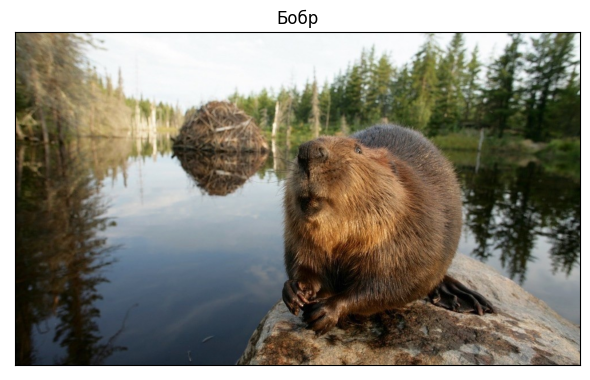

In [56]:
fig, ax = plt.subplots(figsize=(6, 6), layout="tight")
show_image(ax, image, title="Бобр", cmap="gray")

Выделение красного канала

In [57]:
size = image.shape
image_red = [0]*size[0]
for i in range(size[0]):
    image_red[i] = [0]*size[1]  
for i in range(size[0]):
    for j in range(size[1]):
        image_red[i][j] = image[i][j][0]
#image_red = image.copy()
#for i in range(size[0]):
#    for j in range(size[1]):
#        image_red[i][j][1] = 0
#        image_red[i][j][2] = 0



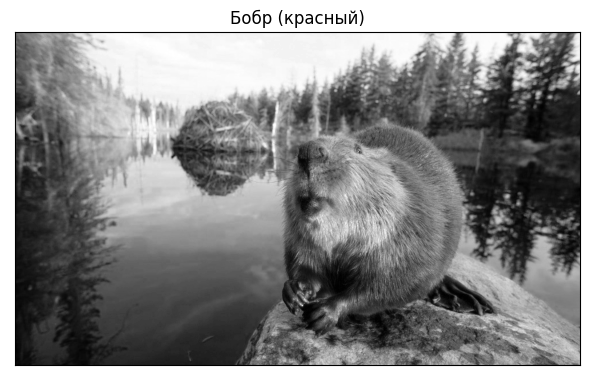

In [58]:
fig, ax = plt.subplots(figsize=(6, 6), layout="tight")
show_image(ax, image_red, title="Бобр (красный)", cmap="gray")

Поворот красного канала на 37 градусов по часовой стрелке:

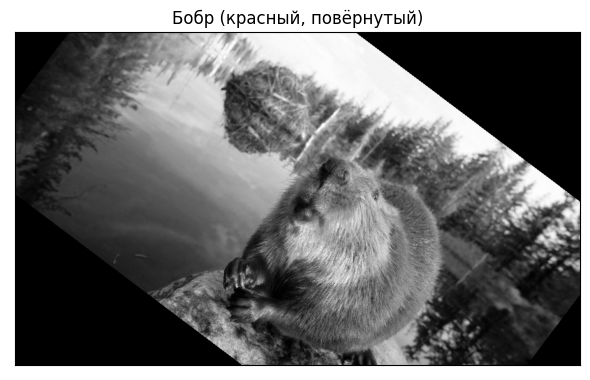

In [59]:
M = [0]*2
for i in range(2):
    M[i] = [0]*2
M[0][0] = math.cos(37*math.pi/180)
M[0][1] = -math.sin(37*math.pi/180)
M[1][0] = math.sin(37*math.pi/180)
M[1][1] = math.cos(37*math.pi/180)
image_red_r = [0]*size[0]
for i in range(size[0]):
    image_red_r[i] = [0]*size[1]
for i in range(size[0]):
    for j in range(size[1]):
        image_red_r[i][j] = [0]*2
for i in range(size[0]):
    for j in range(size[1]):
        image_red_r[i][j][0] = int((i-size[0]/2)*M[0][0]+(j-size[1]/2)*M[0][1])
        image_red_r[i][j][1] = int((i-size[0]/2)*M[1][0]+(j-size[1]/2)*M[1][1])

image_red_2 = [0]*size[0]
for i in range(size[0]):
    image_red_2[i] = [0]*size[1]
for i in range(size[0]):
    for j in range(size[1]):
        if image_red_r[i][j][0]<size[0]/2 and image_red_r[i][j][1]<size[1]/2 and image_red_r[i][j][0]>-size[0]/2 and image_red_r[i][j][1]>-size[1]/2:
            image_red_2[i][j] = image_red[image_red_r[i][j][0]+int(size[0]/2)][image_red_r[i][j][1]+int(size[1]/2)]

fig, ax = plt.subplots(figsize=(6, 6), layout="tight")
show_image(ax, image_red_2, title="Бобр (красный, повёрнутый)", cmap="gray")

Поворот изображения на 37 градусов против часовой стрелки.

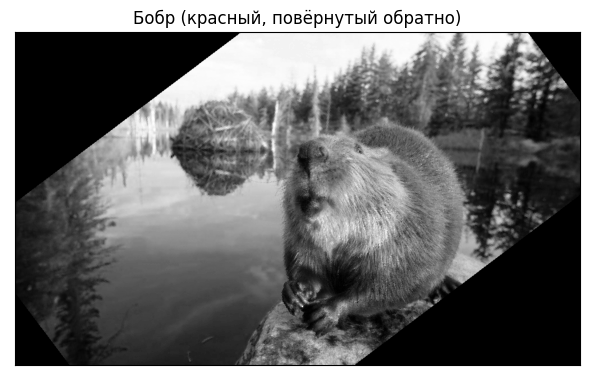

In [60]:
M = [0]*2
for i in range(2):
    M[i] = [0]*2
M[0][0] = math.cos(37*math.pi/180)
M[0][1] = math.sin(37*math.pi/180)
M[1][0] = -math.sin(37*math.pi/180)
M[1][1] = math.cos(37*math.pi/180)
image_red_r = [0]*size[0]
for i in range(size[0]):
    image_red_r[i] = [0]*size[1]
for i in range(size[0]):
    for j in range(size[1]):
        image_red_r[i][j] = [0]*2
for i in range(size[0]):
    for j in range(size[1]):
        image_red_r[i][j][0] = int((i-size[0]/2)*M[0][0]+(j-size[1]/2)*M[0][1])
        image_red_r[i][j][1] = int((i-size[0]/2)*M[1][0]+(j-size[1]/2)*M[1][1])

image_red_3 = [0]*size[0]
for i in range(size[0]):
    image_red_3[i] = [0]*size[1]
for i in range(size[0]):
    for j in range(size[1]):
        if image_red_r[i][j][0]<size[0]/2 and image_red_r[i][j][1]<size[1]/2 and image_red_r[i][j][0]>-size[0]/2 and image_red_r[i][j][1]>-size[1]/2:
            image_red_3[i][j] = image_red_2[image_red_r[i][j][0]+int(size[0]/2)][image_red_r[i][j][1]+int(size[1]/2)]

fig, ax = plt.subplots(figsize=(6, 6), layout="tight")
show_image(ax, image_red_3, title="Бобр (красный, повёрнутый обратно)", cmap="gray")

Модуль разности исходного и полутонового изображения.

C:\Users\ewgen\AppData\Local\Temp\ipykernel_51352\1686159150.py:6: RuntimeWarning: overflow encountered in scalar subtract
  image_red_4[i][j] = abs(image_red[i][j]-image_red_3[i][j])


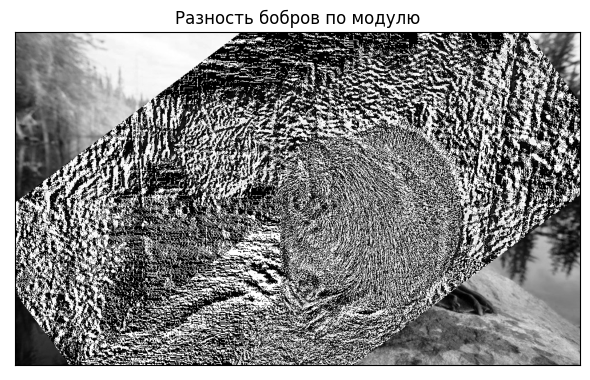

In [62]:
image_red_4 = [0]*size[0]
for i in range(size[0]):
    image_red_4[i] = [0]*size[1]
for i in range(size[0]):
    for j in range(size[1]):
        image_red_4[i][j] = abs(image_red[i][j]-image_red_3[i][j])
fig, ax = plt.subplots(figsize=(6, 6), layout="tight")
show_image(ax, image_red_4, title="Разность бобров по модулю", cmap="gray")